In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report


In [2]:
data = sns.load_dataset('iris')# Load the  iris dataset from seaborn

In [3]:
data[:3]# lets have a look of 1st 3 rcords of the data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
le = LabelEncoder()# species column consists of categorical data which is converted to numbers using encoding

In [5]:
data.species = le.fit_transform(data.species)# here LabelEncoder is used and replaced the categorical data

In [6]:
data.head(3)# Lets check the data after encoding


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [7]:
data.species.unique()# Which are the unique labels in species column

array([0, 1, 2], dtype=int64)

In [8]:
X = data.iloc[:,:-1]# Prepape the input by selecting required columns
X[:3]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [9]:
y = data.species# Species is the output column
y[:3]

0    0
1    0
2    0
Name: species, dtype: int32

In [10]:
#Here we are perfoming the partitioning of the data into train test method
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.2, )

In [11]:
# Lets use the KNeighborsClassifier constru
kn = KNeighborsClassifier(n_neighbors=2, metric='minkowski')

In [12]:
#Training/ Fitting the model 
kn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [13]:
#Calculate the training accuracy
kn.score(X_train, y_train)*100

90.0

In [14]:
#Testing Accuracy
kn.score(X_test, y_test)*100

94.16666666666667

In [15]:
#See few test samples
X_test[:3]

,sepal_length,sepal_width,petal_length,petal_width
18,5.7,3.8,1.7,0.3
56,6.3,3.3,4.7,1.6
34,4.9,3.1,1.5,0.2


In [16]:
#Actual values
y_test[:3]

18    0
56    1
34    0
Name: species, dtype: int32

In [17]:
# Prediction
y_pred = kn.predict(X_test)
y_pred[:3]

array([0, 1, 0])

In [18]:
#prediction accuracy
accuracy_score(y_test,y_pred)*100

94.16666666666667

In [19]:
np.unique(y_pred)

array([0, 1, 2])

In [20]:
#Decode the encoded categories
true = le.inverse_transform(y_pred)
np.unique(true)


array(['setosa', 'versicolor', 'virginica'], dtype=object)

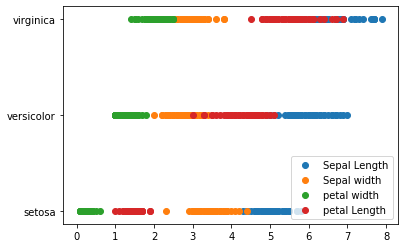

In [21]:
#plot the classification
#plt.subplot(2,2,1)
plt.scatter(X.sepal_length,y, label = 'Sepal Length')
plt.yticks([0,1,2], labels = ['setosa', 'versicolor', 'virginica'])
#plt.subplot(2,2,2)
plt.scatter(X.sepal_width,y, label = 'Sepal width')
#plt.subplot(2,2,3)
plt.scatter(X.petal_width,y, label = 'petal width')
#plt.subplot(2,2,4)
plt.scatter(X.petal_length,y, label = 'petal Length')
plt.legend()
plt.show()

Confusion Matrix is a tool to determine the performance of classifier. It contains information about actual and predicted classifications. The below table shows confusion matrix of two-class, spam and non-spam classifier.

In [22]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 1, 'Actual Vs predicted')

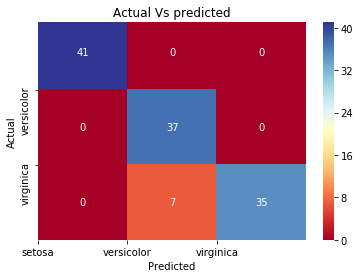

In [27]:
# HEatmap of actual vs predicted
sns.heatmap(cm, annot = True, cmap= 'RdYlBu')
plt.yticks([0,1,2], labels = ['setosa', 'versicolor', 'virginica'])
plt.xticks([0,1,2], labels = ['setosa', 'versicolor', 'virginica'])
plt.ylim(top=0.1, bottom = 3)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual Vs predicted')

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.84      1.00      0.91        37
           2       1.00      0.83      0.91        42

    accuracy                           0.94       120
   macro avg       0.95      0.94      0.94       120
weighted avg       0.95      0.94      0.94       120

